In [ ]:
# installing the Kaggle library
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle


In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

## Importing the Dog vs Cat Dataset from Kaggle

In [ ]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

 99% 806M/812M [00:03<00:00, 209MB/s]
100% 812M/812M [00:03<00:00, 223MB/s]


In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The datadet is extracted')

The datadet is extracted


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
# Counting the number of images in in train folder
path , dirs , files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ',file_count)

Number of images:  25000


## Printing the name of images

In [ ]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.8506.jpg', 'dog.12226.jpg', 'cat.7701.jpg', 'cat.10514.jpg', 'cat.12177.jpg', 'cat.6506.jpg', 'cat.1838.jpg', 'cat.2476.jpg', 'dog.10199.jpg', 'dog.8760.jpg', 'cat.2703.jpg', 'dog.8156.jpg', 'cat.4291.jpg', 'dog.11252.jpg', 'dog.11216.jpg', 'cat.6304.jpg', 'cat.8431.jpg', 'dog.4794.jpg', 'cat.12233.jpg', 'cat.3868.jpg', 'cat.11820.jpg', 'cat.12326.jpg', 'cat.3039.jpg', 'cat.2503.jpg', 'cat.3513.jpg', 'dog.5812.jpg', 'cat.5938.jpg', 'cat.4458.jpg', 'cat.7371.jpg', 'cat.1832.jpg', 'dog.4672.jpg', 'dog.3383.jpg', 'cat.11751.jpg', 'dog.7315.jpg', 'cat.10990.jpg', 'dog.11359.jpg', 'dog.3173.jpg', 'cat.4437.jpg', 'dog.7709.jpg', 'cat.1128.jpg', 'cat.11946.jpg', 'cat.1530.jpg', 'cat.1096.jpg', 'dog.9335.jpg', 'dog.3619.jpg', 'dog.4892.jpg', 'dog.1714.jpg', 'dog.1607.jpg', 'dog.4116.jpg', 'dog.6010.jpg', 'dog.12149.jpg', 'dog.10578.jpg', 'dog.8916.jpg', 'dog.348.jpg', 'dog.11429.jpg', 'dog.2479.jpg', 'cat.10380.jpg', 'dog.7527.jpg', 'cat.5263.jpg', 'cat.5399.jpg', 'cat.2074.jpg', 'cat.50

 ## Importing the Dependencies

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow 

## Displaying the images of dogs and cats

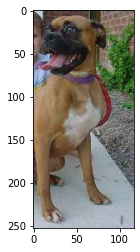

In [ ]:
# display dog image
img = mpimg.imread('/content/train/dog.10199.jpg')
plt.imshow(img)

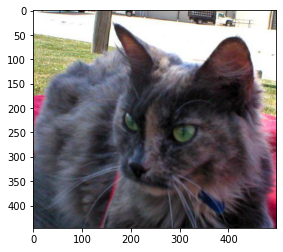

In [ ]:
# display cat image
img = mpimg.imread('/content/train/cat.7701.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
file_names = os.listdir('/content/train')

for i in range(0,10):
  name = file_names[i]
  print(name[0:3])

cat
dog
cat
cat
cat
cat
cat
cat
dog
dog


In [ ]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


## Resizing all the images

In [ ]:
#creating a directory for resized images
os.mkdir('/content/image resized')

## take 2000 images from 25000 images. because we are going to use mobilenet by transfer learning

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder + filename

# Resizing
  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  new_img_path = resized_folder + filename
  img.save(new_img_path)

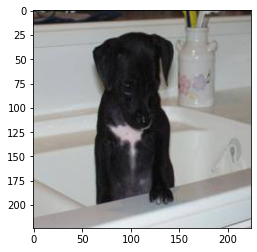

In [ ]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

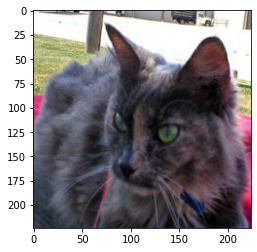

In [ ]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.7701.jpg')
imgplt = plt.imshow(img)
plt.show()

**Creating labels for resized images of dogs and cats**

Cat --> 0

Dog --> 1

In [ ]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))

['cat.8506.jpg', 'dog.12226.jpg', 'cat.7701.jpg', 'cat.10514.jpg', 'cat.12177.jpg']
2000


In [ ]:
print(labels[0:5])
print(len(labels))

[0, 1, 0, 0, 0]
2000


In [ ]:
# counting the images of dogs and cats out of 2000 images
values , counts = np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[1020  980]


In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

[[[[ 52  56  57]
   [ 51  55  56]
   [ 50  54  55]
   ...
   [ 46  48  48]
   [ 46  48  48]
   [ 46  48  48]]

  [[ 52  56  57]
   [ 52  56  57]
   [ 52  56  57]
   ...
   [ 46  48  48]
   [ 46  48  48]
   [ 46  48  48]]

  [[ 52  56  57]
   [ 53  57  58]
   [ 53  57  58]
   ...
   [ 46  48  48]
   [ 46  48  48]
   [ 46  48  48]]

  ...

  [[ 42  47  46]
   [ 41  46  45]
   [ 41  46  45]
   ...
   [ 50  66  72]
   [ 54  70  76]
   [ 52  68  74]]

  [[ 42  47  46]
   [ 42  47  46]
   [ 41  46  45]
   ...
   [ 47  61  67]
   [ 48  62  68]
   [ 50  64  70]]

  [[ 42  47  46]
   [ 42  47  46]
   [ 42  47  46]
   ...
   [ 43  57  63]
   [ 42  56  62]
   [ 46  60  66]]]


 [[[  8   9   7]
   [ 20  21  19]
   [  4   5   3]
   ...
   [ 22  18  13]
   [ 54  48  41]
   [110 104  97]]

  [[ 12  13  11]
   [ 10  11   9]
   [ 10  11   9]
   ...
   [ 21  17  12]
   [ 58  52  45]
   [112 106  99]]

  [[ 16  17  15]
   [  1   2   0]
   [ 18  19  17]
   ...
   [ 24  20  15]
   [ 68  62  55]
   [116 110

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
X = dog_cat_images
Y = np.asarray(labels)

## **Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


## 1600 --> training images

## 400 --> test images

In [ ]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled)

[[[[0.44313725 0.50980392 0.46666667]
   [0.43529412 0.50196078 0.45882353]
   [0.42352941 0.49411765 0.44313725]
   ...
   [0.24313725 0.19607843 0.18823529]
   [0.23921569 0.19215686 0.18431373]
   [0.23921569 0.19215686 0.18431373]]

  [[0.44313725 0.50980392 0.46666667]
   [0.42352941 0.50196078 0.45490196]
   [0.40784314 0.48627451 0.43529412]
   ...
   [0.23921569 0.19215686 0.18431373]
   [0.23529412 0.18823529 0.18039216]
   [0.23137255 0.18431373 0.17647059]]

  [[0.43137255 0.50980392 0.4627451 ]
   [0.40784314 0.49411765 0.44705882]
   [0.38823529 0.47843137 0.42352941]
   ...
   [0.23137255 0.18431373 0.17647059]
   [0.22745098 0.18039216 0.17254902]
   [0.22745098 0.18039216 0.17254902]]

  ...

  [[0.61960784 0.62352941 0.63921569]
   [0.64313725 0.64705882 0.6627451 ]
   [0.6627451  0.66666667 0.68235294]
   ...
   [0.4745098  0.50980392 0.56470588]
   [0.50196078 0.52941176 0.58823529]
   [0.52156863 0.54901961 0.60784314]]

  [[0.6627451  0.66666667 0.68235294]
   [0.6

## **Building the Neural Network**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['acc']

)

In [ ]:
model.fit(X_train_scaled,Y_train, epochs = 5)

Epoch 1/5
50/50 [==============================] - 46s 838ms/step - loss: 0.2025 - acc: 0.9175
Epoch 2/5
50/50 [==============================] - 43s 865ms/step - loss: 0.0714 - acc: 0.9756
Epoch 3/5
50/50 [==============================] - 42s 838ms/step - loss: 0.0533 - acc: 0.9844
Epoch 4/5
50/50 [==============================] - 42s 838ms/step - loss: 0.0416 - acc: 0.9869
Epoch 5/5
50/50 [==============================] - 43s 854ms/step - loss: 0.0338 - acc: 0.9912


In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 12s 851ms/step - loss: 0.0533 - acc: 0.9775
Test Loss = 0.05331815406680107
Test Accuracy = 0.9775000214576721


## **Predictive System**

path of the image to be predicted: /content/African-savanna-elephant.webp


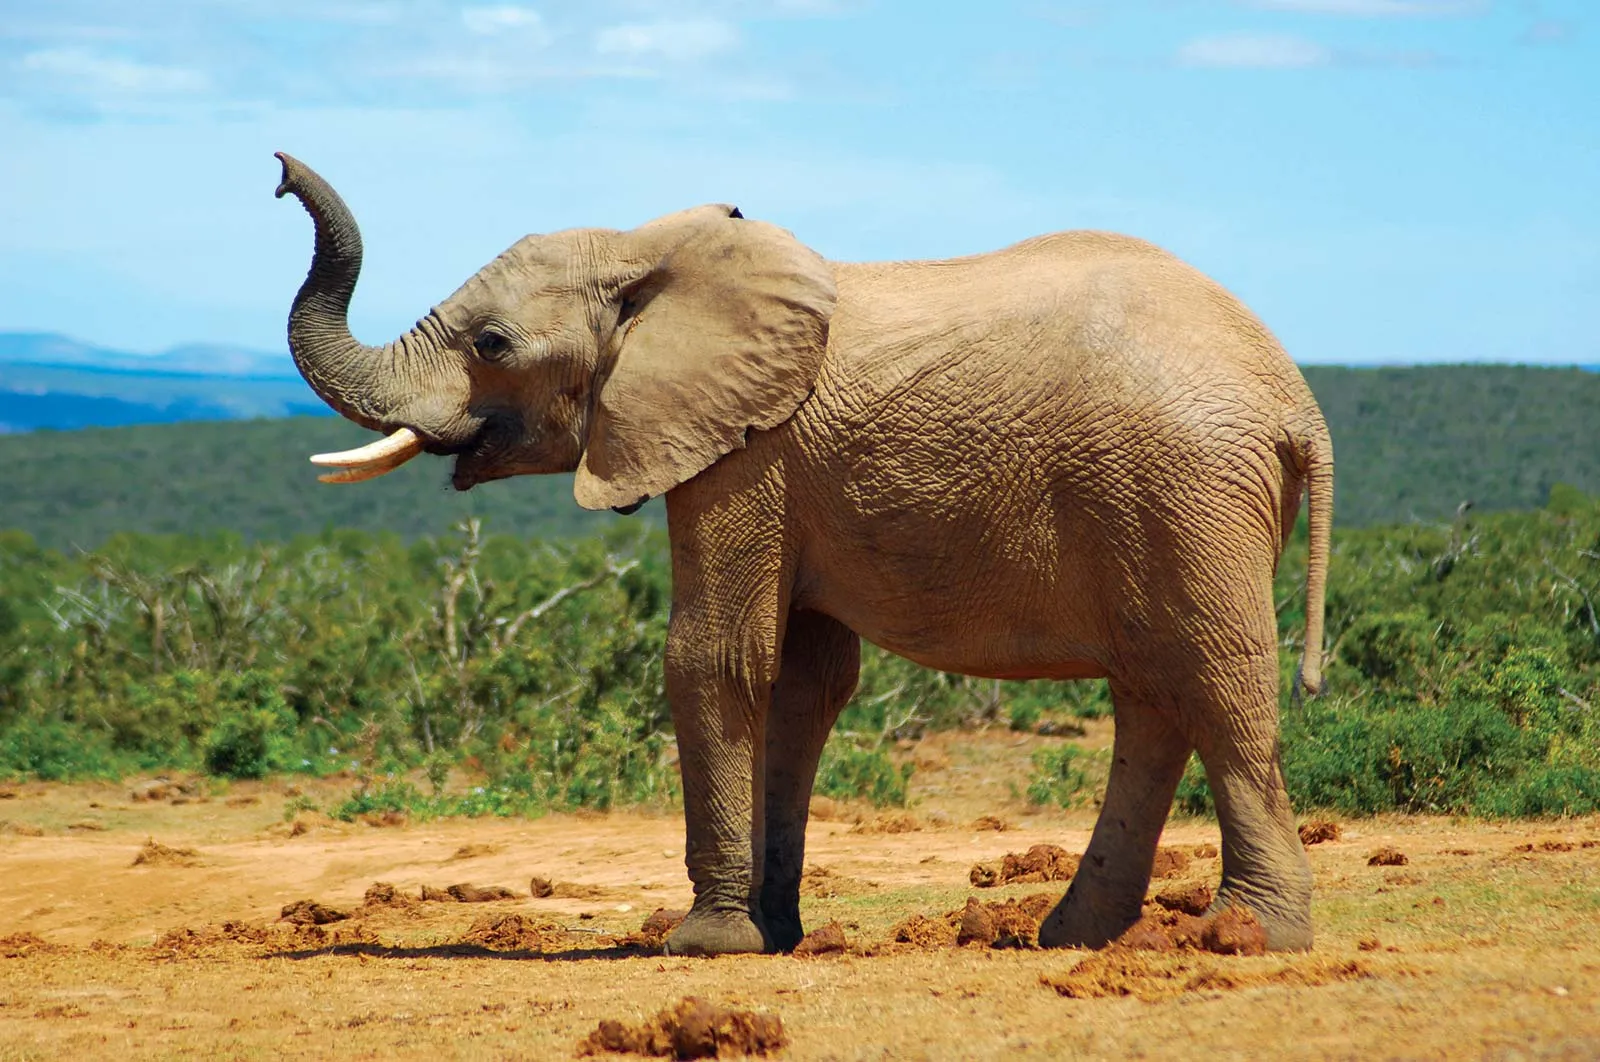

[[-0.80259275  1.1417207 ]]
1
The image represents a Dog


In [ ]:
input_image_path = input('path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image , (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled,[1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')





path of the image to be predicted: /content/download.jpg


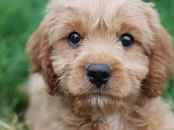

[[-3.527503   3.7532673]]
1
The image represents a Dog


In [ ]:
input_image_path = input('path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image , (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled,[1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')





path of the image to be predicted: /content/cat.jpg


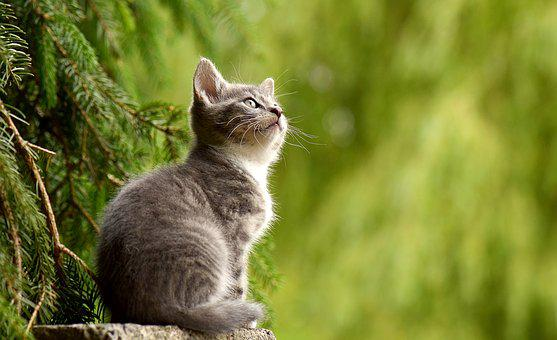

[[ 2.6571028 -3.498808 ]]
0
The image represents a Cat


In [ ]:
input_image_path = input('path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image , (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled,[1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')



